In [4]:
import numpy as np
import pandas as pd
import seaborn
import warnings
warnings.filterwarnings('ignore')

==============================================================================================================

Q7
=
KNN
=
The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

==============================================================================================================

In [2]:
df = pd.DataFrame({'Obs':[1,2,3,4,5,6],
                   'X1': [0,2,0,0,-1,1],
                   'X2': [3,0,1,1,0,-1],
                   'X3': [0,0,3,2,1,1],
                   'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
df

,Obs,X1,X2,X3,Y
0,1,0,3,0,Red
1,2,2,0,0,Red
2,3,0,1,3,Red
3,4,0,1,2,Green
4,5,-1,0,1,Green
5,6,1,-1,1,Red


<br><br><br>Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

In [10]:
def euclidean_dist(x):
    '''Compute the row-wise Euclidean distance from the origin'''
    return np.sqrt(np.sum(pow(x,2), axis=1)) #For any value of x, this first squares it, 
                                            #then sums all the squares, then takes the square root of that sum.
                                            #this is then assigned to euclidean_dist function.
#Now we can use the euclidean_dist function in the existing dataframe (df) and put the result into 
#a new dataframe called euc_dist.
euc_dist = pd.DataFrame({'EuclideanDist': euclidean_dist(df[['X1', 'X2', 'X3']])})

#Now we can add (concatanate) the new column called EuclideanDist to the existing dataframe df.
df_euc = pd.concat([df,euc_dist], axis = 1)
df_euc

,Obs,X1,X2,X3,Y,EuclideanDist
0,1,0,3,0,Red,3.000000
1,2,2,0,0,Red,2.000000
2,3,0,1,3,Red,3.162278
3,4,0,1,2,Green,2.236068
4,5,-1,0,1,Green,1.414214
5,6,1,-1,1,Red,1.732051


<br><br><br>(b) What is our prediction with K = 1? Why?

In [13]:
K = 1
df_euc.nsmallest(K, 'EuclideanDist') #df_euc.nsmallest(n, columns, keep='first') -> 'DataFrame'; 
                                    #Return the first `n` rows with the smallest values in `columns`, 
                                    #in ascending order.

,Obs,X1,X2,X3,Y,EuclideanDist
4,5,-1,0,1,Green,1.414214


So the prediction would be Green since Observation 5 is the response value to KNN where K=1.

<br><br><br>(c) What is our prediction with K = 3? Why?

In [14]:
K = 3
df_euc.nsmallest(K, 'EuclideanDist')

,Obs,X1,X2,X3,Y,EuclideanDist
4,5,-1,0,1,Green,1.414214
5,6,1,-1,1,Red,1.732051
1,2,2,0,0,Red,2.000000


The prediction would be Red since majority of the observations 2,5, and 6 are Red.

<br><br><br>(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

Small. A smaller value of K results in a more flexible classification model because the prediciton is based upon a smaller subset of all observations in the dataset. A large K would try to fit a more linear boundary because it takes more
points into consideration.

<br><br><br>

==============================================================================================================

Q8
=

COLLEGE DATA SET
=

This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US.

==============================================================================================================

<br><br><br>(a) Read the data

In [64]:
df_college = pd.read_csv('~/Documents/Programming/Data Science/Book-ISLR/Data/College.csv')
df_college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


You should notice that the first column is just the name of each university. We don’t really want Python to treat this as data. However, it may be handy to have these names for later.

<br><br><br>(b) Label rows by college name

In [32]:
#First move the college names out of data to an index and append it to the dataframe. Give this dataframe a new
#name.
college = df_college.set_index(['Unnamed: 0'], append=True, verify_integrity=True)
college.head()

,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,Unnamed: 0,,,,,,,,,,,,,,,,,,
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [34]:
#Since the index of college names column doesn't have a name, we rename that axis from None to 'College'.
college.rename_axis([None, 'College'], inplace=True)
college.head()

,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,College,,,,,,,,,,,,,,,,,,
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<br><br><br>(c) i. Use the summary() function to produce a numerical summary of the variables in the data set.

In [35]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<br><br><br>(c) ii. Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data.

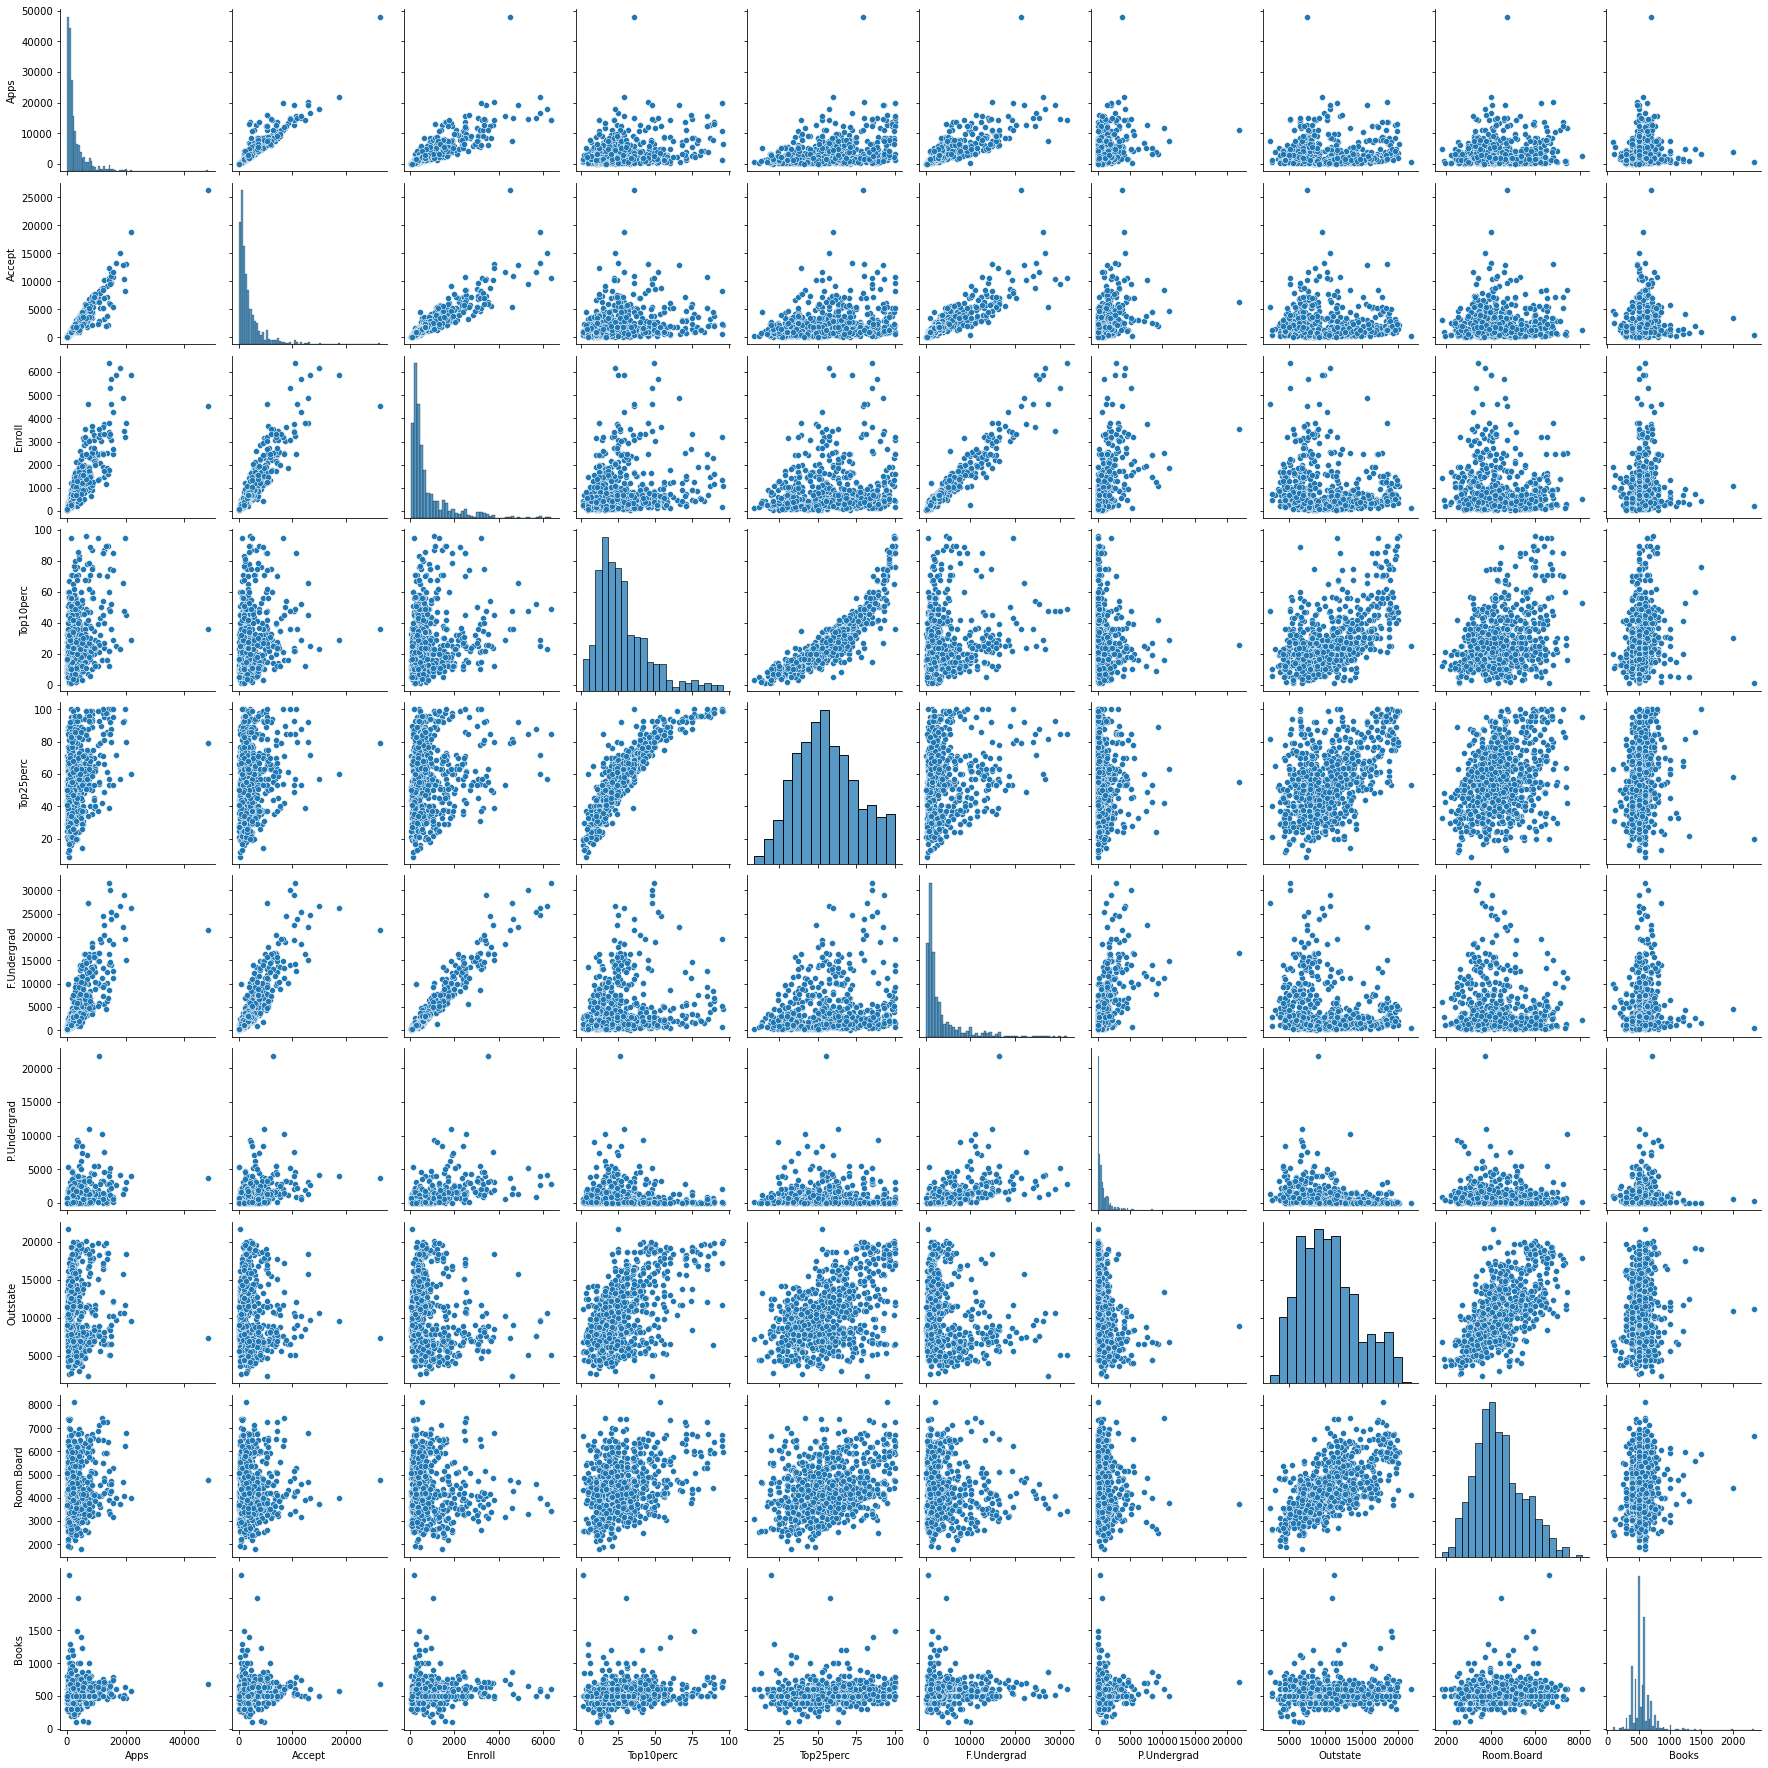

In [36]:
seaborn.pairplot(college.iloc[:,1:11])

<br><br><br>(c) iii. Produce side-by-side boxplots of Outstate versus Private.

<AxesSubplot:title={'center':'Outstate'}, xlabel='[Private]'>

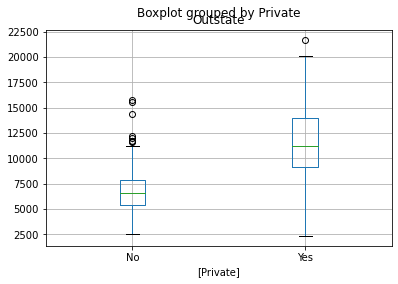

In [45]:
college.boxplot(column=['Outstate'], by=['Private'])

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

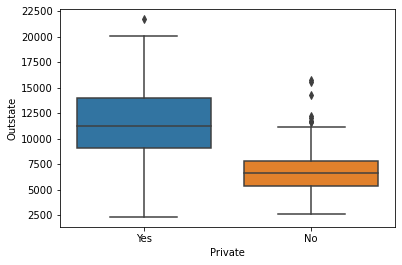

In [46]:
#Alternatively,
seaborn.boxplot(x=college['Private'], y=college['Outstate'])

<br><br><br>(c) iv. Create a new qualitative variable, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50 %.

See how many elite universities there are.

Produce side-by-side boxplots of Outstate versus Elite.

In [48]:
college['Elite'] = college['Top10perc'] > 50
college['Elite'].sum()

78

<AxesSubplot:title={'center':'Outstate'}, xlabel='[Elite]'>

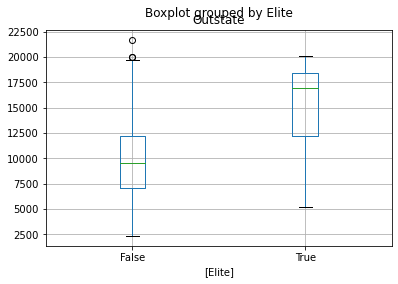

In [54]:
college.boxplot(column=['Outstate'], by=['Elite'])

<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

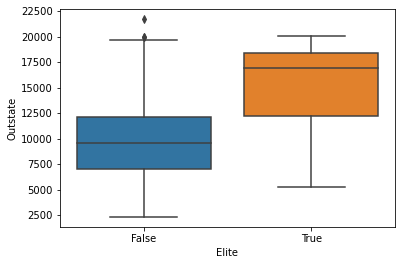

In [51]:
seaborn.boxplot(x=college['Elite'], y=college['Outstate'])

<br><br><br>(c) v. produce some histograms with differing numbers of bins for a few of the quantitative variables.

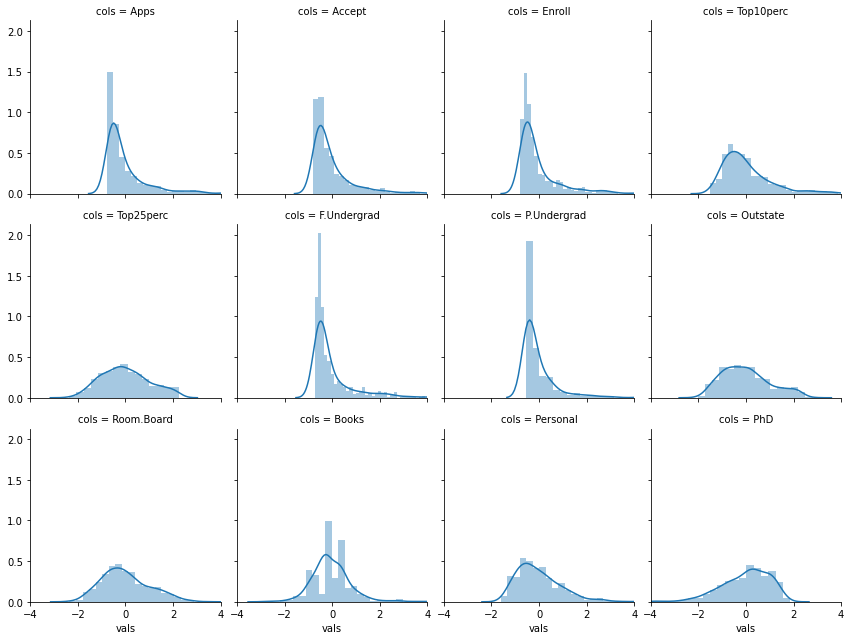

In [62]:
#To compare between variables with histogram we can first scale them.

def scale(df):
    '''scaling is done by Xi = (Xi - mean(Xi))/sd(Xi)'''
    return (df - df.mean()) / (df.std())

#We will plot 12 graphs:
feature_count = 12

#Scale/normalize the college variables:
college_normalized = scale(college.iloc[:, 1:feature_count+1]) #+1 b/c count starts from 0.

#Then we recast the data into long format using melt. Ie, unpivot identifier and value variables.
college_melt = college_normalized.melt(var_name='cols', value_name='vals')

#Plot grid of plots:
grid = seaborn.FacetGrid(college_melt, col='cols', col_wrap=4)
grid.map(seaborn.distplot, 'vals')
grid.set(xlim=(-4, 4))

<br><br><br>

===================================================================================================

Q9
=
AUTO DATA SET
=

This exercise involves the Auto data set studied in the lab. 

====================================================================================================

In [145]:
auto_raw = pd.read_csv('~/Documents/Programming/Data Science/Book-ISLR/Data/Auto.csv')
auto_raw.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


<br><br><br>Make sure that the missing values have been removed from the data.

In [147]:
#Before removing the missing values we can do a check whether there are any by asking 
#if the sum of missing values = 0:
#First, to check whether there are missing values in the data we can use .isna() function. This function 
    #returns True if the values are NA, None, etc. Characters such as empty strings ('') are not 
    #considered NA values unless you set 'pandas.options.mode.use_inf_as_na=True'.
#Second, we need to 
auto_raw.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [148]:
#We know that the data has missing values but the above gave 0 for each column. This is because in the data set
#the missing values are indicated by ? and not NA or None, etc. So we need to accomodate for this:
    #First, we can check if any of the values = ? and then add them.
(auto_raw.values == '?').sum()

5

In [149]:
#Now that we know there are 5 missing values, lets check what these are:
mv = auto[auto_raw.values == '?']
mv

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [150]:
#To remove these we will use the .drop() function. This function Remove rows or columns by specifying label 
#names and corresponding axis, or by specifying directly index or column names. But our mv is not a label name.
#So we will have to first specify it as an index:
auto_clean = auto_raw.drop(mv.index)
#Then check again if there are any missing values left after removing the data:
(auto_clean.values == '?').sum()

0

In [151]:
#Finally, we can compare the original and cleaned up data lengts:
len(auto_raw)-len(auto_clean)

5

<br><br><br>(a) Which of the predictors are quantitative, and which are qualitative?
<br>
Qualitative: origin and name
<br>Quantitative: First 7 columns, though note that the 6th column is the model year

<br><br><br>(b) What is the range of each quantitative predictor?

In [124]:
#We can create a dataframe for the first 7 columns and get min and max for the range:
auto_range = pd.DataFrame({'min': auto_clean.iloc[:,0:7].min(),
             'max': auto_clean.iloc[:,0:7].max()})
auto_range

,min,max
mpg,9,46.6
cylinders,3,8
displacement,68,455
horsepower,100,98
weight,1613,5140
acceleration,8,24.8
year,70,82


In [125]:
#The range doesn't make sense for horsepower where min is 100 and max is 98. First lets see what the data looks like:
auto_clean.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [131]:
#well, the data set seems to be ok. Next, lets check the data type for each column:
auto_clean.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [160]:
#Ok, so the type of horsepower is object. We need to convert it to integer:
auto_clean['horsepower'] = auto_clean['horsepower'].astype(int)
auto_clean.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [162]:
##Now we have the horsepower as integer. Let's run the range again:
auto_range = pd.DataFrame({'min': auto_clean.iloc[:,0:7].min(),
             'max': auto_clean.iloc[:,0:7].max()})
auto_range

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0


In [163]:
#Horsepower makes a whole lot more sense now.
#For presentation we can also transpose the dataframe to maintain the data set format:
auto_range_T = auto_range.transpose()
auto_range_T

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0


<br><br><br>(c) What is the mean and standard deviation of each quantitative predictor?

In [175]:
#Similarly we can build a dataframe that shows the mean and st.dev. I took out the stdev for year:

auto_mustdev = pd.DataFrame({'mean': auto_clean.iloc[:,0:7].mean(),
                            'st dev': auto_clean.iloc[:,0:6].std()})
auto_mustdev_T = auto_mustdev.transpose()
auto_mustdev_T

,acceleration,cylinders,displacement,horsepower,mpg,weight,year
mean,15.541327,5.471939,194.411990,104.469388,23.445918,2977.584184,75.979592
st dev,2.758864,1.705783,104.644004,38.491160,7.805007,849.402560,NaN


<br><br><br>(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [168]:
#Just as we did with the missing variables we can also use the .drop() function to remove the observations:

auto_reduced = auto_clean.drop(auto_clean.index[10:85])
len(auto_reduced)

317

In [174]:
#For range, mean and st dev of the reduced we can again build a dataframe:

auto_red_st = pd.DataFrame({'min': auto_reduced.iloc[:,0:7].min(),
                           'max': auto_reduced.iloc[:,0:7].max(),
                           'mean': auto_reduced.iloc[:,0:7].mean(),
                           'st dev': auto_reduced.iloc[:,0:6].std()})
auto_red_st_T = auto_red_st.transpose()
auto_red_st_T

,acceleration,cylinders,displacement,horsepower,mpg,weight,year
min,8.500000,3.000000,68.000000,46.000000,11.000000,1649.000000,70.000000
max,24.800000,8.000000,455.000000,230.000000,46.600000,4997.000000,82.000000
mean,15.704101,5.381703,187.880126,101.003155,24.374763,2938.854890,77.123028
st dev,2.719913,1.658135,100.169973,36.003208,7.872565,811.640668,NaN


<br><br><br> (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

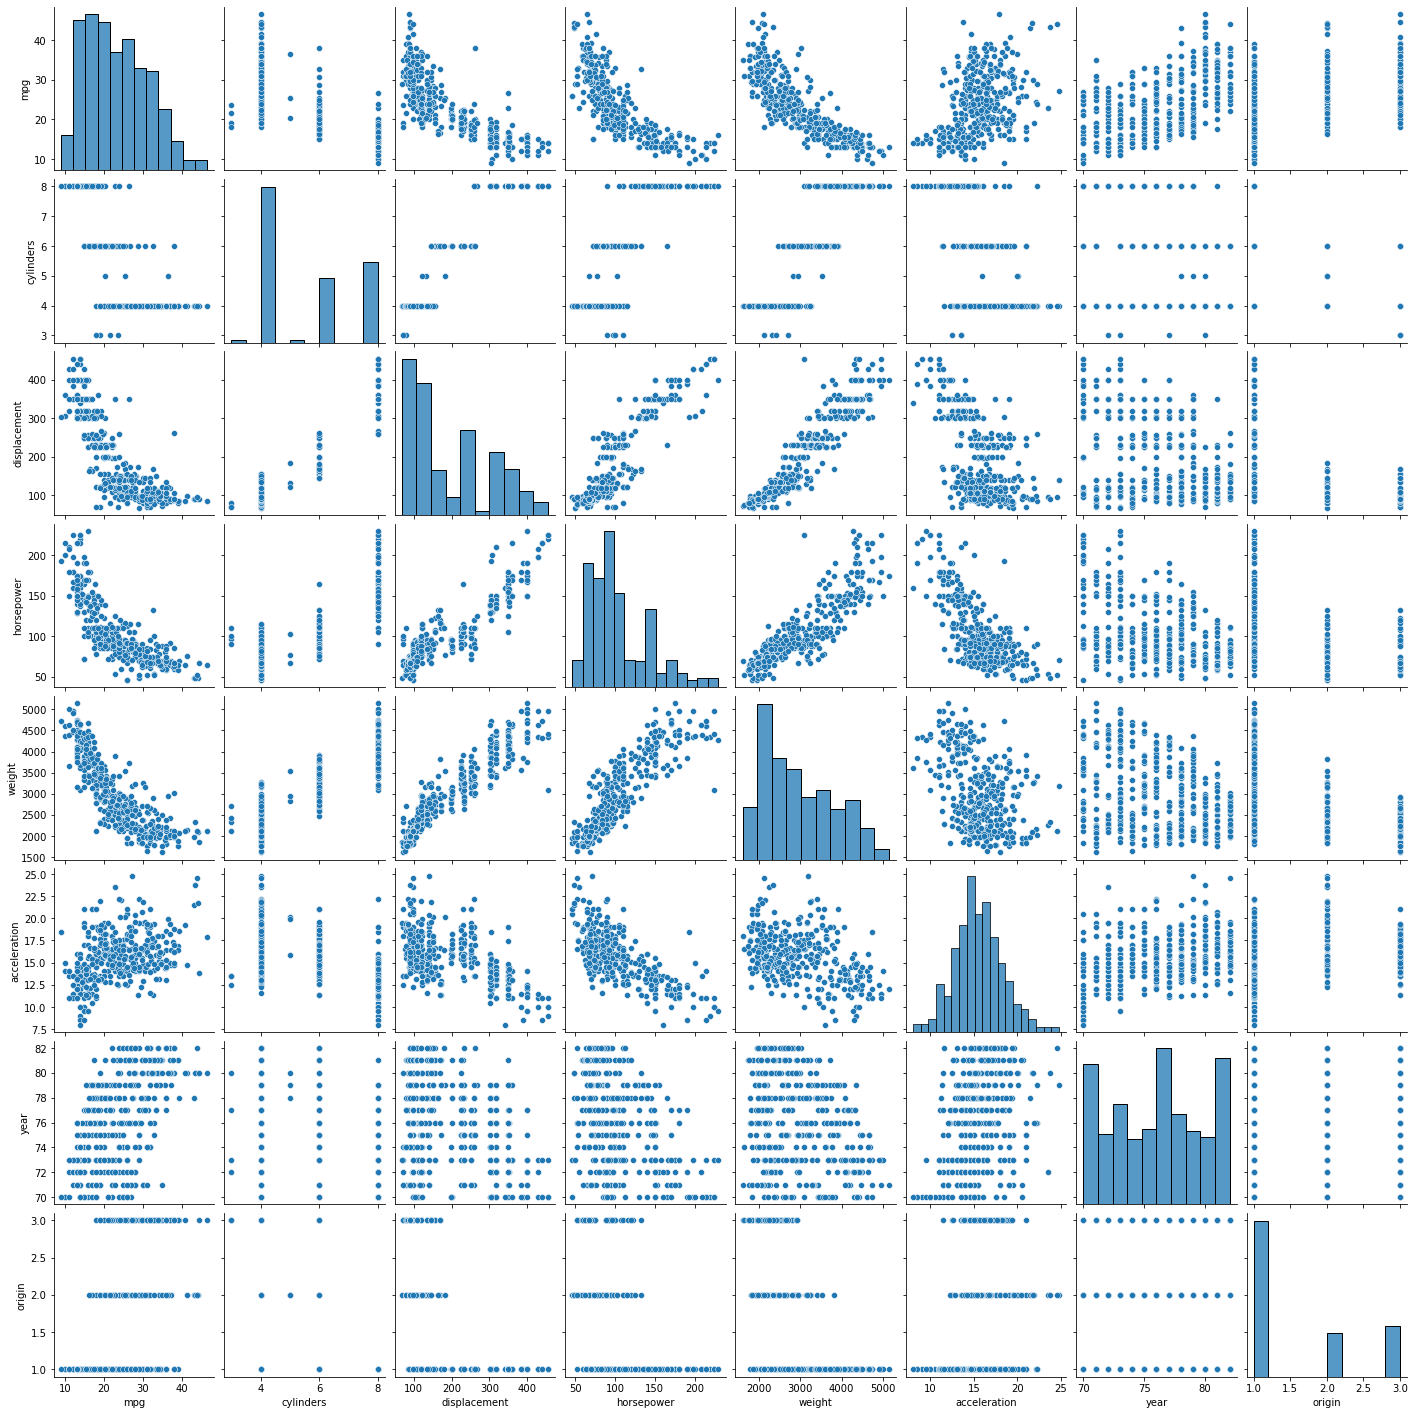

In [177]:
seaborn.pairplot(auto_clean)

There seems to be a convex relationship between mpg and displacement, horsepower and weight.
There seems to be a strong +ve linear relationship between displacement, horsepower and weight.
Acceleration also seems to show a somewhat weaker -ve relationship with displacement, horsepower and weight, and a weaker +ve relationship with mpg.
Also, there seems to be a positive tendency of increased mpg as the cars get younger.

<br><br><br>

===================================================================================================

Q10
=
BOSTON HOUSING DATA SET
=

This exercise involves the Boston housing data set. 

====================================================================================================

<br><br>(a) Load in the Boston data set. How many rows are in this data set? How many columns?

In [187]:
boston = pd.read_csv('~/Documents/Programming/Data Science/Book-ISLR/Data/BostonHousing.csv')
boston.shape

(506, 14)

In [188]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [235]:
boston.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


<br><br><br> (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

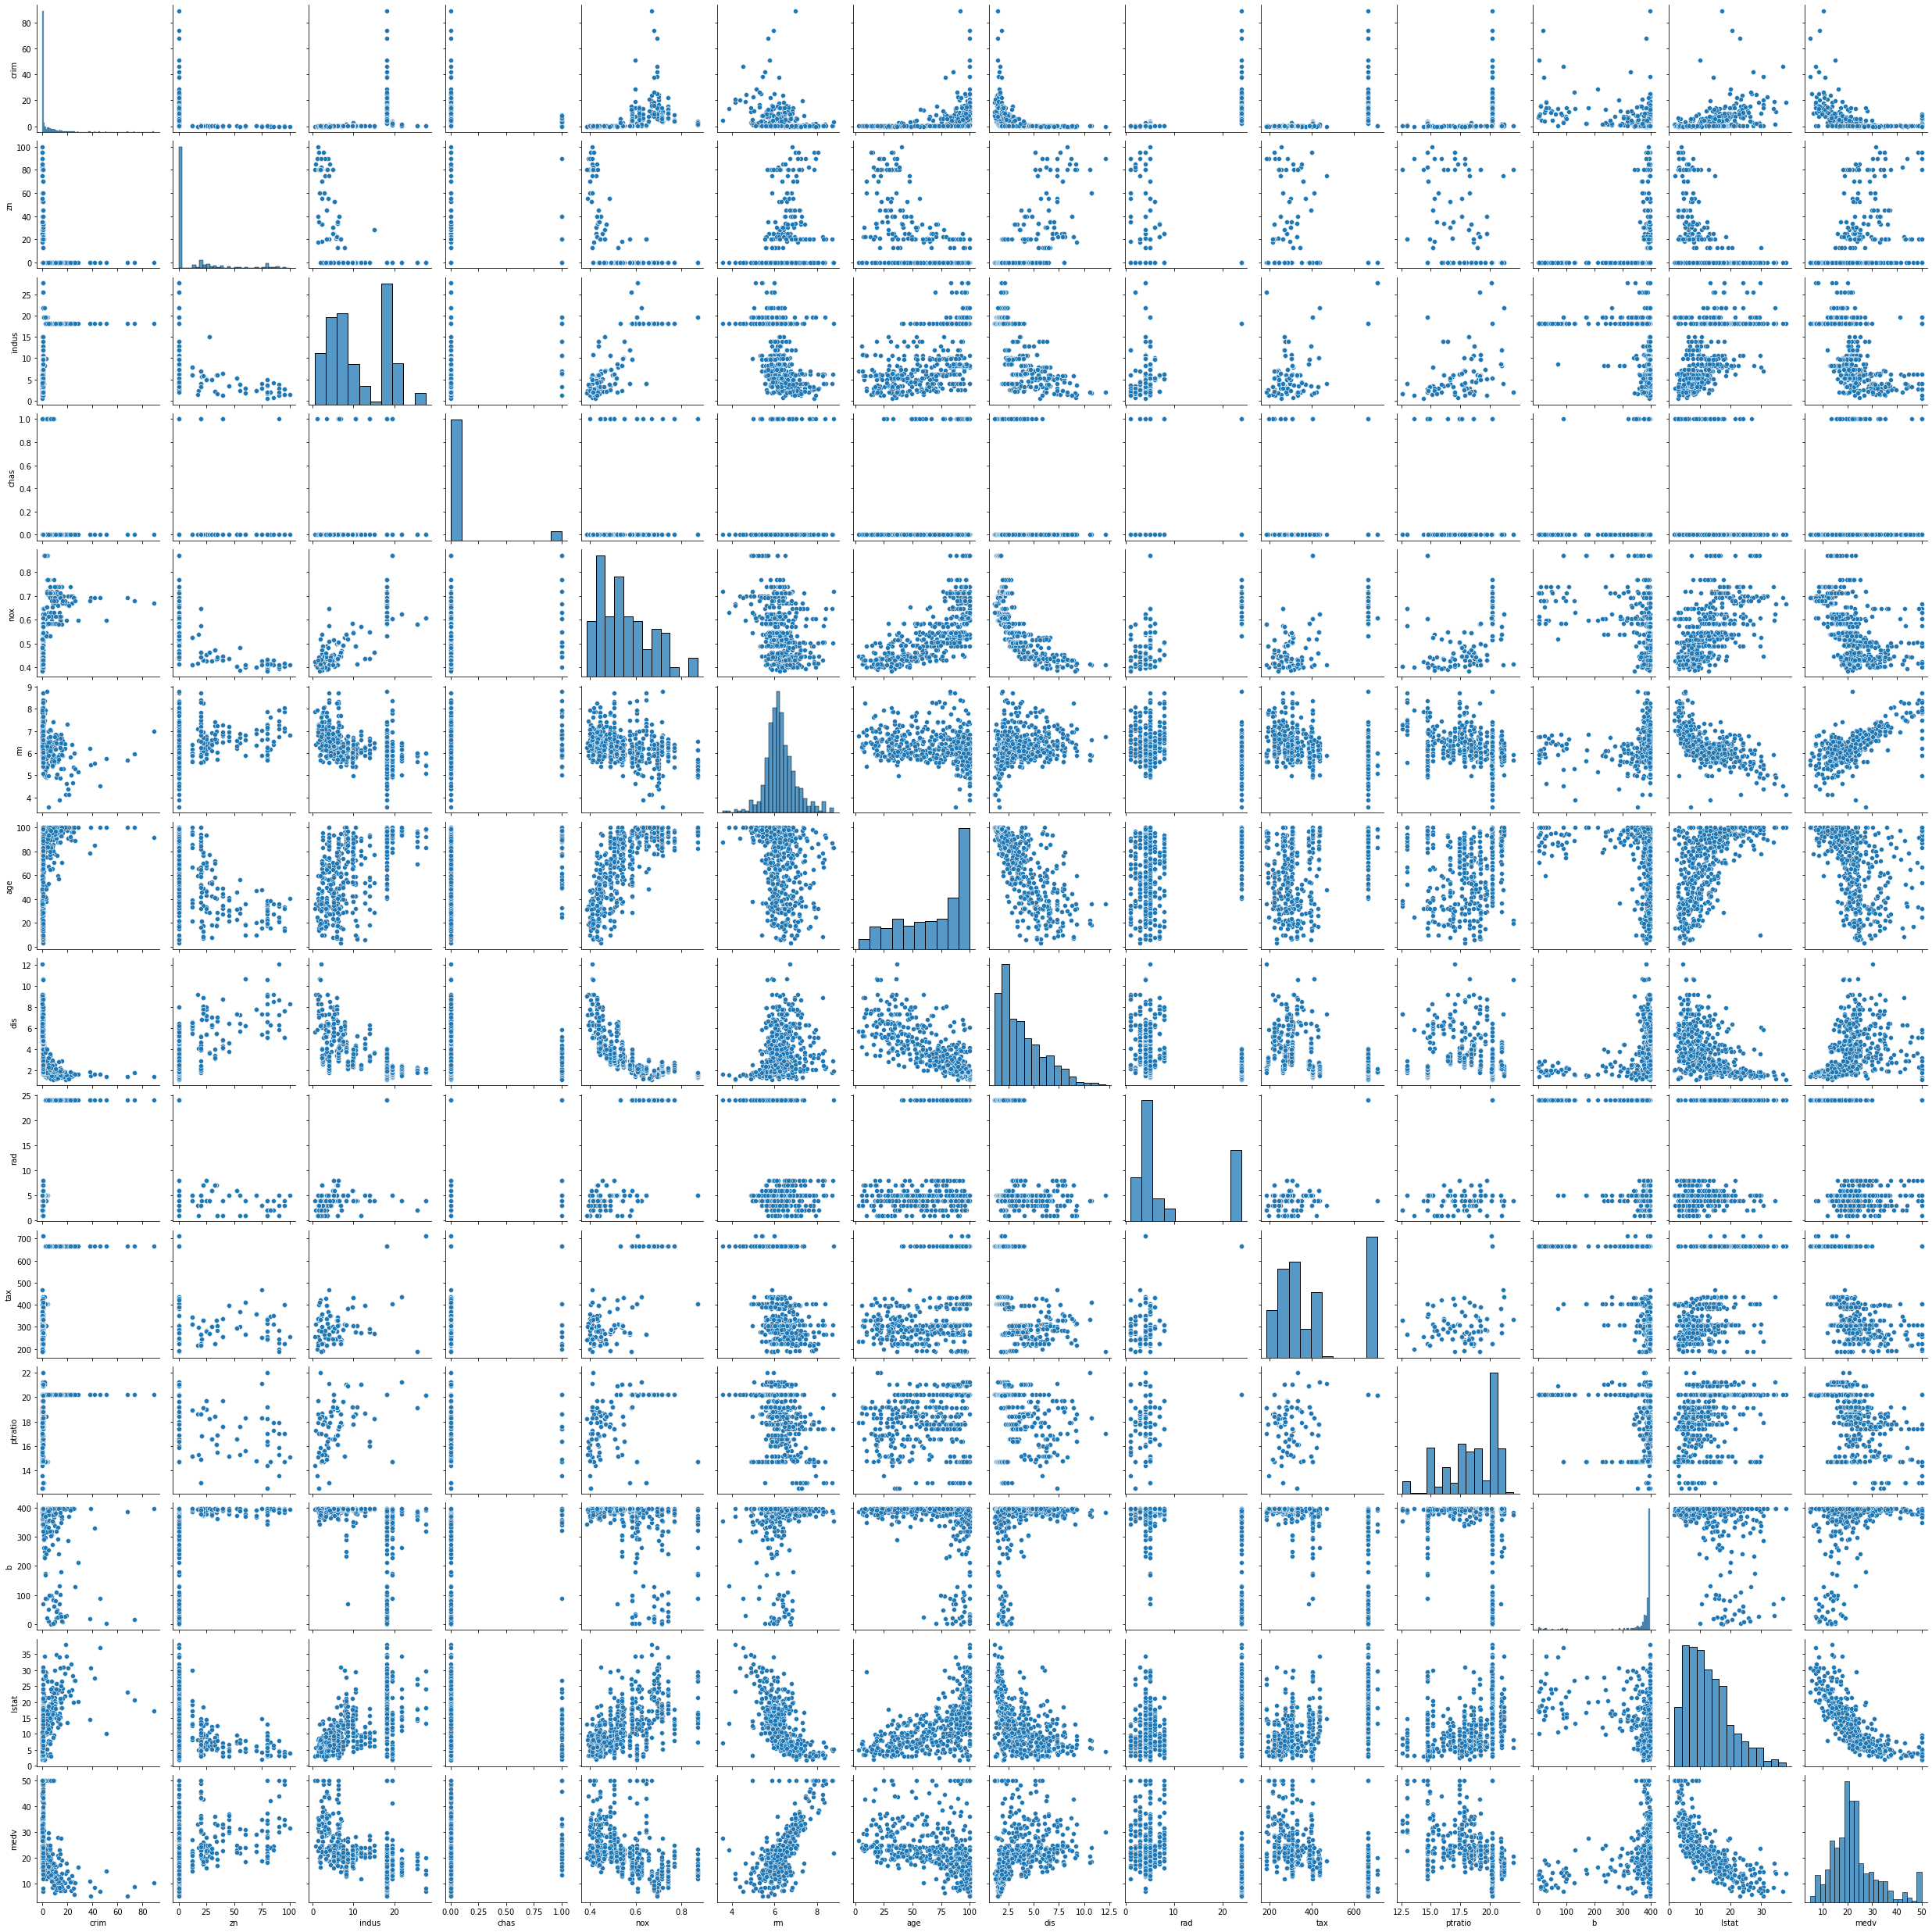

In [190]:
seaborn.pairplot(boston)

<br><br><br> (c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [252]:
import matplotlib.pyplot as plt

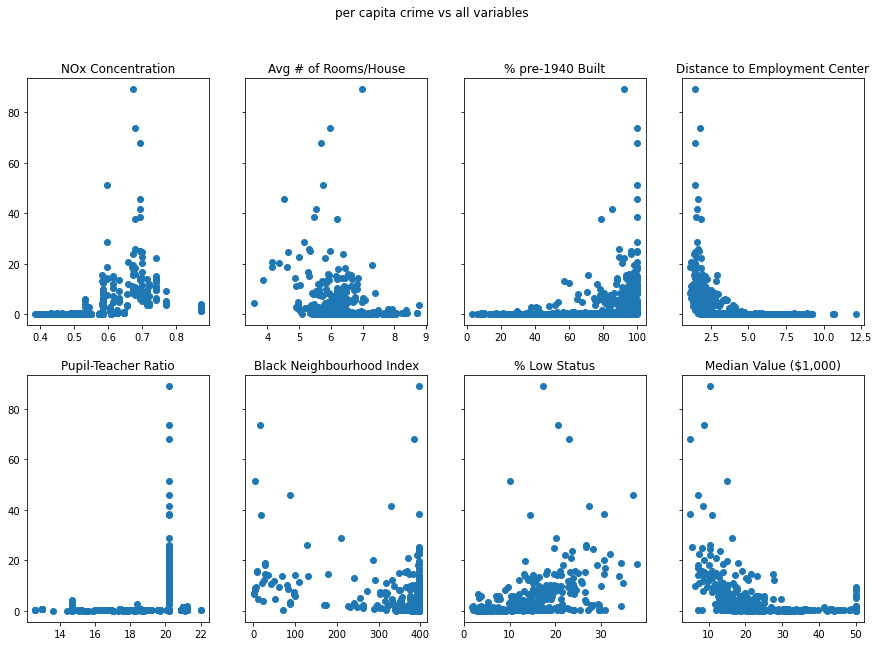

In [261]:
fig, axs = plt.subplots(2,4, sharex=False, sharey=True, figsize=(15,10))
fig.suptitle('per capita crime vs all variables')

axs[0,0].scatter(boston['nox'],boston['crim'])
axs[0,0].set_title('NOx Concentration')

axs[0,1].scatter(boston['rm'],boston['crim'])
axs[0,1].set_title('Avg # of Rooms/House')

axs[0,2].scatter(boston['age'],boston['crim'])
axs[0,2].set_title('% pre-1940 Built')

axs[0,3].scatter(boston['dis'],boston['crim'])
axs[0,3].set_title('Distance to Employment Center')

axs[1,0].scatter(boston['ptratio'],boston['crim'])
axs[1,0].set_title('Pupil-Teacher Ratio')

axs[1,1].scatter(boston['b'],boston['crim'])
axs[1,1].set_title('Black Neighbourhood Index')

axs[1,2].scatter(boston['lstat'],boston['crim'])
axs[1,2].set_title('% Low Status')

axs[1,3].scatter(boston['medv'],boston['crim'])
axs[1,3].set_title('Median Value ($1,000)')

fig.show()

<br><br><br> (d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

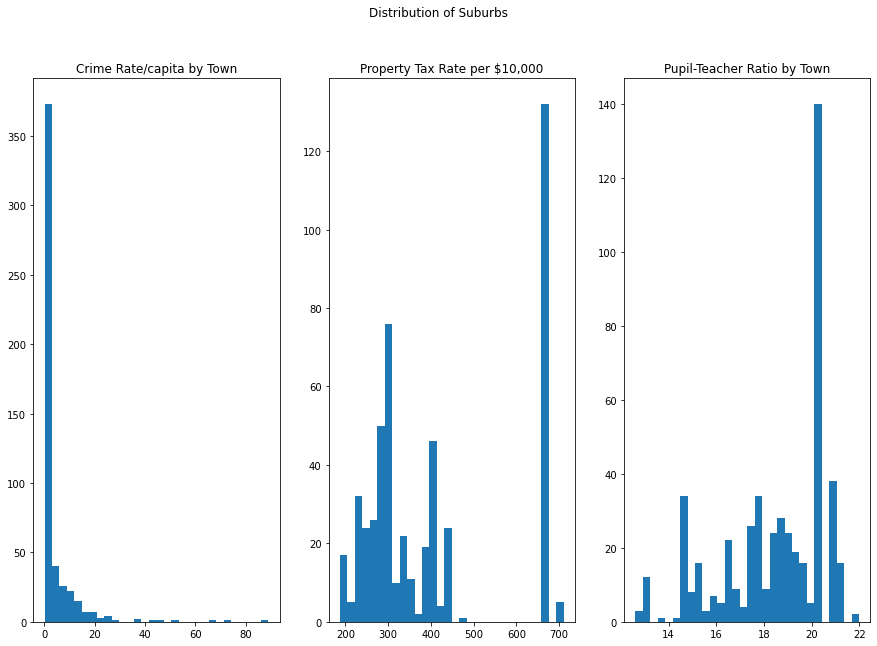

In [265]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
fig.suptitle('Distribution of Suburbs')
ax1.hist(boston['crim'], bins=30)
ax1.set_title('Crime Rate/capita by Town')
ax2.hist(boston['tax'],bins=30)
ax2.set_title('Property Tax Rate per $10,000')
ax3.hist(boston['ptratio'],bins=30)
ax3.set_title('Pupil-Teacher Ratio by Town')
fig.show()

It seems approx 5 Towns have very high crime rates and another 10-15 Towns have noticable crime rates. The rest of Boston seems quite low on crime rate.
There is a big divide between Towns with very high tax rate and towns with low property tax rate.
There are very few Towns with low P-T ratios.

<br><br><br>(e) How many of the suburbs in this data set bound the Charles river?

In [266]:
boston['chas'].sum()

35

<br><br><br> (f)What is the median pupil-teacher ratio among the towns in this data set?

In [267]:
boston['ptratio'].median()

19.05

<br><br><br> (g) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? 

In [285]:
bostonboston.loc[boston['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

Its the suburb no.398 with the median value of owner occupied home of $5,000. The values of the other predictors are given in the output.

In [288]:
#To compare the suburb no 398 with the ranges of predictors first lets get a description of the boston data set.
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see that this neighbourhood:
<br> --> has a relatively high crime rate, closer to the max than min in the crim range.
<br> --> has high non-retail business acres
<br>--> has a high NOx concentration (parts per 10 million)
<br>--> relatively fewer number of rooms per dwelling
<br>--> entirely pre-1940 built neighbourhood
<br>--> has a very low weighted mean of distances to five Boston employment centers
<br>--> has the highest index of accessibility to radial highways
<br>--> has a very high full-value property tax
<br>--> has a very high pupil-teacher ratio
<br>--> has the highest index value for proportion of black people (1000(Bk - 0.63)^2 where Bk is the proportion of black people)
<br>--> has a very high % of lower status of the population
